In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2       #video processing
import os        #file read,write
import PIL       #image resize,rotate,crop
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib

data_dir = pathlib.Path("datasets/flower_photos/flower_photos")
print(data_dir)
print(data_dir.exists())


datasets/flower_photos/flower_photos
True


In [5]:
image_paths = list(data_dir.glob("*/*.jpg"))   #This finds .jpg images inside subfolders of data_dir
print(len(image_paths))
image_paths[:5]


3670


[PosixPath('datasets/flower_photos/flower_photos/sunflowers/8014734302_65c6e83bb4_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/sunflowers/14144522269_bc20029375_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/sunflowers/4933230991_d50c0f7c66.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/sunflowers/10386540106_1431e73086_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/sunflowers/4414080766_5116e8084e.jpg')]

In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/1756973583_4aac7df00d_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/2550860627_998a4fc4c1.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/16152175716_55d6968e08_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/319298955_0c72bd36bf.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/3872230296_6c477309f3_n.jpg')]

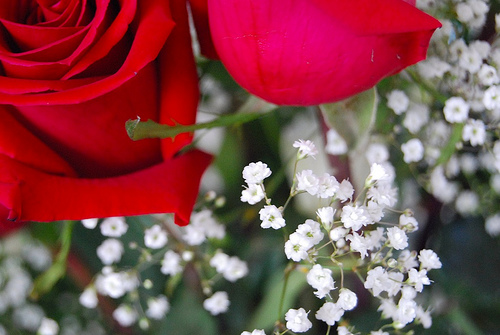

In [7]:
PIL.Image.open(roses[1])

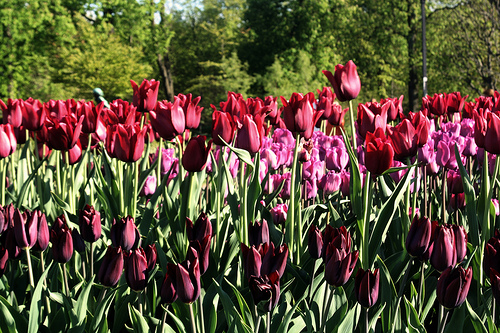

In [8]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(tulips[0])


Read flowers images from disk into numpy array using opencv

In [9]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [10]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [11]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/1756973583_4aac7df00d_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/2550860627_998a4fc4c1.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/16152175716_55d6968e08_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/319298955_0c72bd36bf.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/3872230296_6c477309f3_n.jpg')]

In [12]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/flower_photos/roses/1756973583_4aac7df00d_m.jpg'

In [13]:
img = cv2.imread(flowers_images_dict['roses'][0])

In [14]:
img.shape

(215, 240, 3)

In [15]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [16]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [17]:
X = np.array(X)
y = np.array(y)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Preprocessing: scale images

In [19]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255


Build convolutional neural network and train it

In [21]:
num_classes=5

model=Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

model.fit(X_train_scaled,y_train,epochs=2)

Epoch 1/2
86/86 ━━━━━━━━━━━━━━━━━━━━ 79s 885ms/step - accuracy: 0.3707 - loss: 1.4501
Epoch 2/2
86/86 ━━━━━━━━━━━━━━━━━━━━ 82s 893ms/step - accuracy: 0.6115 - loss: 0.9895


In [22]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 291ms/step


array([[-0.9148073 ,  1.8944523 , -0.9320386 , -0.59832025, -1.3846201 ],
       [ 2.4907055 , -0.69883865, -1.6801655 , -0.8864533 ,  2.179326  ],
       [-0.786674  ,  0.1825373 ,  0.16180663, -0.08619659, -0.5605011 ],
       ...,
       [-2.8849468 , -2.6491544 ,  0.64962095,  2.4968195 ,  0.0261908 ],
       [-0.24897547,  0.05885346, -1.7902156 ,  0.61536527,  0.01912778],
       [-1.390207  , -0.84460586,  0.60869443,  1.066042  , -0.7464033 ]],
      dtype=float32)

In [23]:
score = tf.nn.softmax(predictions[0])

In [24]:
np.argmax(score)

np.int64(1)

In [25]:
y_test[0]

np.int64(1)

In [30]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 289ms/step - accuracy: 0.1595 - loss: 1.6416


[1.639274001121521, 0.1666666716337204]


Improve Test Accuracy Using Data Augmentation

In [26]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(180, 180, 3)), # Assuming images are resized to 180x180
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# Note: I've replaced 'img_height' and 'img_width' with 180 based on your previous resizing.
# Ensure this matches the actual input size you intend for the augmentation layer.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


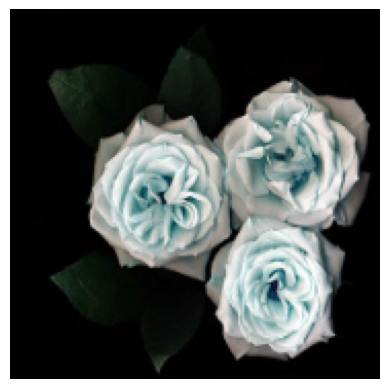

In [27]:
plt.axis('off')
plt.imshow(X[0])

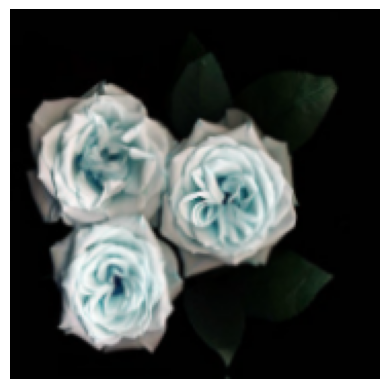

In [28]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [31]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),       #drop some neuron to prevent overfitting
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
86/86 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.4006 - loss: 1.3658
Epoch 2/2
86/86 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.5592 - loss: 1.0407


In [32]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 285ms/step - accuracy: 0.5833 - loss: 1.0501


[1.0431352853775024, 0.5675381422042847]

After augmentation the accuracy is increased from 16% to 58%. For running just 2 epochs